In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

from msfm.utils import scales, files

In [6]:
conf = "/global/homes/a/athomsen/multiprobe-simulation-forward-model/configs/v8/linear_bias.yaml"
conf = files.load_config(conf)

n_side = 512
n_pix = hp.nside2npix(n_side)
data_vec_pix, _, _, _ = files.load_pixel_file(conf)

n_z = 8
l_min_global = 30
l_max_global = 3 * n_side - 1

24-05-21 07:18:31     files.py INF   Loaded the pixel file /global/u2/a/athomsen/multiprobe-simulation-forward-model/data/DESY3_pixels_v11_512.h5 


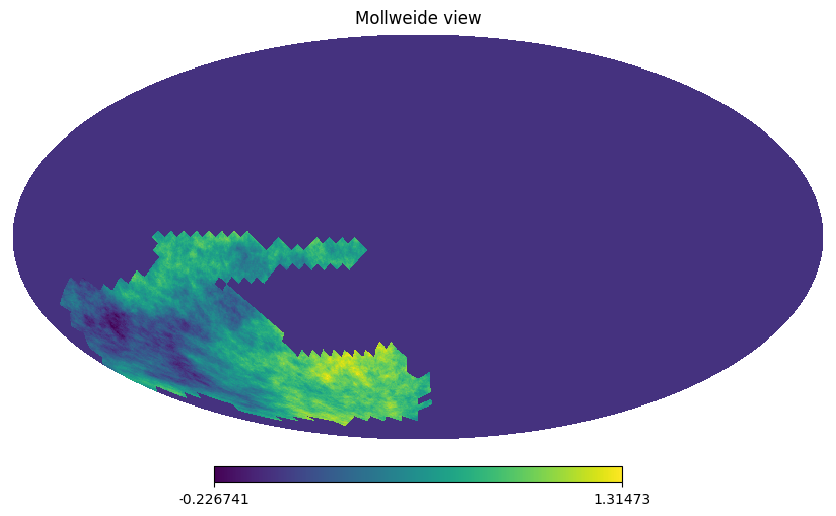

In [8]:
# we start be generating a random map
np.random.seed(11)
Cl = np.arange(1, 1001)**-3.
full_sky = hp.synfast(cls=Cl, nside=n_side)
full_sky = hp.reorder(full_sky, r2n=True)

example = np.zeros(n_pix)
example[data_vec_pix] = full_sky[data_vec_pix]

hp.mollview(example, nest=True)

In [23]:
raw_cls = hp.anafast(example)

fwhm = 20

smooth_cls_direct = scales.cls_to_smoothed_cls(raw_cls, theta_fwhm=fwhm)

smooth_map, _ = scales.map_to_smoothed_map(example, n_side, theta_fwhm=fwhm)
smooth_cls_map = hp.anafast(smooth_map)

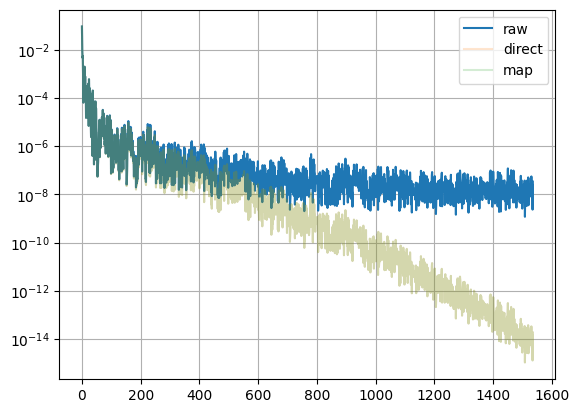

In [32]:
fig, ax = plt.subplots()

ax.plot(raw_cls, label="raw")
ax.plot(smooth_cls_direct, label="direct", alpha=0.2)
ax.plot(smooth_cls_map, label="map", alpha=0.2)

ax.set(xscale="linear", yscale="log")
ax.legend()
ax.grid(True)